In [1]:
# Adapted from https://github.com/LouisScorpio/datamining/blob/master/tensorflow-program/rnn/stock_predict/stock_predict_2.00_py

import pandas as pd

pf = pd.read_json("price.json")
print(pf.keys)
print(pf['dataset']['column_names'])
print(pf['dataset']['data'])
print(len(pf['dataset']['data']))


<bound method NDFrame.keys of                                                                  dataset
collapse                                                            None
column_index                                                        None
column_names           [Date, Open, High, Low, Last, Change, Settle, ...
data                   [[2018-04-05, 24250.0, 24596.0, 24234.0, 24480...
database_code                                                      CHRIS
database_id                                                          596
dataset_code                                                     CME_YM1
description            Historical Futures Prices: E-mini Dow ($5) Fut...
end_date                                                      2018-04-05
frequency                                                          daily
id                                                              10981347
limit                                                               None
name                 

In [2]:
# contruct training data, settle_y is next day settle price y
original_data = pd.DataFrame(columns= pf['dataset']['column_names'], data = pf['dataset']['data'])
# original_data = original_data.sort_index(axis=1 ,ascending=True)
original_data = original_data.iloc[::-1]
original_data.index = range(len(original_data))

y = original_data.loc[1:2630, ['Settle']]
y.index = range(len(y))

# train_data = pd.concat([original_data, y], axis=1)
train_data = pd.merge(original_data,y , left_index=True, right_index=True)
train_data.drop(['Change'], axis = 1, inplace = True, errors = 'ignore')
train_data

,Date,Open,High,Low,Last,Settle_x,Volume,Previous Day Open Interest,Settle_y
0,2007-10-01,13981.0,14198.0,13963.0,14157.0,14157.00,126582.0,82131.0,14106.00
1,2007-10-02,14152.0,14191.0,14092.0,14106.0,14106.00,164099.0,88574.0,14052.00
2,2007-10-03,14106.0,14116.0,14024.0,14052.0,14052.00,124265.0,87096.0,14041.00
3,2007-10-04,14057.0,14090.0,14026.0,14041.0,14041.00,131584.0,90300.0,14156.00
4,2007-10-05,14029.0,14204.0,14025.0,14156.0,14156.00,87204.0,90779.0,14112.00
5,2007-10-08,14147.0,14164.0,14086.0,14112.0,14112.00,137314.0,93418.0,14237.00
6,2007-10-09,14119.0,14248.0,14095.0,14237.0,14237.00,68308.0,91719.0,14142.00
7,2007-10-10,14228.0,14234.0,14076.0,14142.0,14142.00,126670.0,95249.0,14086.00
8,2007-10-11,14144.0,14267.0,14015.0,14086.0,14086.00,147329.0,92762.0,14179.00
9,2007-10-12,14076.0,14193.0,14038.0,14179.0,14179.00,223193.0,94180.0,14066.00


In [3]:
import numpy as np
import tensorflow as tf

#define constant variable, hidden layer units and learn rate
rnn_unit=10      
input_size=7      
output_size=1
lr=0.0006       

In [4]:
#getData
data=train_data.iloc[:,1:9].values
data

array([[  13981.,   14198.,   13963., ...,  126582.,   82131.,   14106.],
       [  14152.,   14191.,   14092., ...,  164099.,   88574.,   14052.],
       [  14106.,   14116.,   14024., ...,  124265.,   87096.,   14041.],
       ..., 
       [  24097.,   24147.,   23306., ...,  355871.,   98611.,   23984.],
       [  23609.,   24010.,   23545., ...,  354073.,  101366.,   24265.],
       [  23981.,   24282.,   23361., ...,  381535.,   96215.,   24468.]])

In [6]:
#get training set
def get_train_data(batch_size=60,time_step=20,train_begin=0,train_end=1800):
    batch_index=[]
    data_train=data[train_begin:train_end]
    # Stardardization
    normalized_train_data=(data_train-np.mean(data_train,axis=0))/np.std(data_train,axis=0)  
    train_x,train_y=[],[]   
    for i in range(len(normalized_train_data)-time_step):
       if i % batch_size==0:
           batch_index.append(i)
       x=normalized_train_data[i:i+time_step,:7]
       y=normalized_train_data[i:i+time_step,7,np.newaxis]
       train_x.append(x.tolist())
       train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data)-time_step))
    return batch_index,train_x,train_y


#get test set
def get_test_data(time_step=20,test_begin=1800):
    data_test=data[test_begin:]
    mean=np.mean(data_test,axis=0)
    std=np.std(data_test,axis=0)
    normalized_test_data=(data_test-mean)/std  
    size=(len(normalized_test_data)+time_step-1)//time_step  #有size个sample
    test_x,test_y=[],[]
    for i in range(size-1):
       x=normalized_test_data[i*time_step:(i+1)*time_step,:7]
       y=normalized_test_data[i*time_step:(i+1)*time_step,7]
       test_x.append(x.tolist())
       test_y.extend(y)
    test_x.append((normalized_test_data[(i+1)*time_step:,:7]).tolist())
    test_y.extend((normalized_test_data[(i+1)*time_step:,7]).tolist())
    return mean,std,test_x,test_y


#define neural networks parameters
#define input/ouput weight, bias

weights={
         'in':tf.Variable(tf.random_normal([input_size,rnn_unit])),
         'out':tf.Variable(tf.random_normal([rnn_unit,1]))
        }
biases={
        'in':tf.Variable(tf.constant(0.1,shape=[rnn_unit,])),
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
       }

#LSTM
def lstm(X):
    
    batch_size=tf.shape(X)[0]
    time_step=tf.shape(X)[1]
    w_in=weights['in']
    b_in=biases['in']
    input=tf.reshape(X,[-1,input_size])  
    input_rnn=tf.matmul(input,w_in)+b_in
    input_rnn=tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
    cell=tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnn_unit)
    init_state=cell.zero_state(batch_size,dtype=tf.float32)
    output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)
    output=tf.reshape(output_rnn,[-1,rnn_unit]) 
    w_out=weights['out']
    b_out=biases['out']
    pred=tf.matmul(output,w_out)+b_out
    return pred,final_states

#train LSTM

def train_lstm(batch_size=60,time_step=20,train_begin=1800,train_end=2500):
    X=tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    Y=tf.placeholder(tf.float32, shape=[None,time_step,output_size])
    batch_index,train_x,train_y=get_train_data(batch_size,time_step,train_begin,train_end)
    with tf.variable_scope("sec_lstm"):
        pred,_=lstm(X)
    loss=tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
    train_op=tf.train.AdamOptimizer(lr).minimize(loss)
    saver=tf.train.Saver(tf.global_variables(),max_to_keep=15)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #number of iteration
        for i in range(2000):     
            for step in range(len(batch_index)-1):
                _,loss_=sess.run([train_op,loss],feed_dict={X:train_x[batch_index[step]:batch_index[step+1]],Y:train_y[batch_index[step]:batch_index[step+1]]})
            print("Number of iterations:",i," loss:",loss_)
        print("model_save: ",saver.save(sess,'modle.ckpt'))
        print("The train has finished")
train_lstm()



Number of iterations: 0  loss: 3.62642
Number of iterations: 1  loss: 2.72092
Number of iterations: 2  loss: 1.98347
Number of iterations: 3  loss: 1.40816
Number of iterations: 4  loss: 0.979803
Number of iterations: 5  loss: 0.678563
Number of iterations: 6  loss: 0.478427
Number of iterations: 7  loss: 0.351826
Number of iterations: 8  loss: 0.274223
Number of iterations: 9  loss: 0.226647
Number of iterations: 10  loss: 0.196132
Number of iterations: 11  loss: 0.174735
Number of iterations: 12  loss: 0.158106
Number of iterations: 13  loss: 0.144161
Number of iterations: 14  loss: 0.13206
Number of iterations: 15  loss: 0.121505
Number of iterations: 16  loss: 0.112357
Number of iterations: 17  loss: 0.104472
Number of iterations: 18  loss: 0.0976775
Number of iterations: 19  loss: 0.0917941
Number of iterations: 20  loss: 0.0866605
Number of iterations: 21  loss: 0.0821429
Number of iterations: 22  loss: 0.0781355
Number of iterations: 23  loss: 0.074554
Number of iterations: 24  

Number of iterations: 194  loss: 0.00614693
Number of iterations: 195  loss: 0.00610766
Number of iterations: 196  loss: 0.00606828
Number of iterations: 197  loss: 0.00603012
Number of iterations: 198  loss: 0.00599162
Number of iterations: 199  loss: 0.00595429
Number of iterations: 200  loss: 0.005917
Number of iterations: 201  loss: 0.00588005
Number of iterations: 202  loss: 0.00584443
Number of iterations: 203  loss: 0.00580735
Number of iterations: 204  loss: 0.00577368
Number of iterations: 205  loss: 0.00573646
Number of iterations: 206  loss: 0.00570416
Number of iterations: 207  loss: 0.00566808
Number of iterations: 208  loss: 0.0056349
Number of iterations: 209  loss: 0.00560315
Number of iterations: 210  loss: 0.00556496
Number of iterations: 211  loss: 0.00554212
Number of iterations: 212  loss: 0.00549483
Number of iterations: 213  loss: 0.00548283
Number of iterations: 214  loss: 0.00542902
Number of iterations: 215  loss: 0.00541713
Number of iterations: 216  loss: 0.

Number of iterations: 382  loss: 0.00381392
Number of iterations: 383  loss: 0.00347438
Number of iterations: 384  loss: 0.00431685
Number of iterations: 385  loss: 0.00379027
Number of iterations: 386  loss: 0.00492841
Number of iterations: 387  loss: 0.00406315
Number of iterations: 388  loss: 0.00497493
Number of iterations: 389  loss: 0.00371291
Number of iterations: 390  loss: 0.00371852
Number of iterations: 391  loss: 0.00360685
Number of iterations: 392  loss: 0.00448271
Number of iterations: 393  loss: 0.0126581
Number of iterations: 394  loss: 0.0208572
Number of iterations: 395  loss: 0.0444074
Number of iterations: 396  loss: 0.0330888
Number of iterations: 397  loss: 0.0341054
Number of iterations: 398  loss: 0.0067799
Number of iterations: 399  loss: 0.00734912
Number of iterations: 400  loss: 0.00355969
Number of iterations: 401  loss: 0.00488965
Number of iterations: 402  loss: 0.00354058
Number of iterations: 403  loss: 0.00522548
Number of iterations: 404  loss: 0.003

Number of iterations: 570  loss: 0.00302757
Number of iterations: 571  loss: 0.00309097
Number of iterations: 572  loss: 0.00301246
Number of iterations: 573  loss: 0.00311992
Number of iterations: 574  loss: 0.00300091
Number of iterations: 575  loss: 0.00316647
Number of iterations: 576  loss: 0.00299843
Number of iterations: 577  loss: 0.00322964
Number of iterations: 578  loss: 0.0030074
Number of iterations: 579  loss: 0.00328252
Number of iterations: 580  loss: 0.00301339
Number of iterations: 581  loss: 0.00323784
Number of iterations: 582  loss: 0.00299718
Number of iterations: 583  loss: 0.00301087
Number of iterations: 584  loss: 0.00326864
Number of iterations: 585  loss: 0.00337404
Number of iterations: 586  loss: 0.00669838
Number of iterations: 587  loss: 0.00971853
Number of iterations: 588  loss: 0.0266128
Number of iterations: 589  loss: 0.0279319
Number of iterations: 590  loss: 0.0493635
Number of iterations: 591  loss: 0.0129946
Number of iterations: 592  loss: 0.01

Number of iterations: 757  loss: 0.00296482
Number of iterations: 758  loss: 0.00295148
Number of iterations: 759  loss: 0.00296641
Number of iterations: 760  loss: 0.00294388
Number of iterations: 761  loss: 0.00297062
Number of iterations: 762  loss: 0.00293476
Number of iterations: 763  loss: 0.00297889
Number of iterations: 764  loss: 0.0029244
Number of iterations: 765  loss: 0.0029929
Number of iterations: 766  loss: 0.00291406
Number of iterations: 767  loss: 0.00301332
Number of iterations: 768  loss: 0.00290613
Number of iterations: 769  loss: 0.00303437
Number of iterations: 770  loss: 0.00290262
Number of iterations: 771  loss: 0.00302989
Number of iterations: 772  loss: 0.00290679
Number of iterations: 773  loss: 0.00294725
Number of iterations: 774  loss: 0.00300886
Number of iterations: 775  loss: 0.00292946
Number of iterations: 776  loss: 0.00418957
Number of iterations: 777  loss: 0.00507672
Number of iterations: 778  loss: 0.0135823
Number of iterations: 779  loss: 0.

Number of iterations: 945  loss: 0.00284478
Number of iterations: 946  loss: 0.00284712
Number of iterations: 947  loss: 0.00284201
Number of iterations: 948  loss: 0.00284356
Number of iterations: 949  loss: 0.00283965
Number of iterations: 950  loss: 0.00283967
Number of iterations: 951  loss: 0.00283793
Number of iterations: 952  loss: 0.00283515
Number of iterations: 953  loss: 0.0028373
Number of iterations: 954  loss: 0.00282949
Number of iterations: 955  loss: 0.00283861
Number of iterations: 956  loss: 0.00282197
Number of iterations: 957  loss: 0.00284355
Number of iterations: 958  loss: 0.00281174
Number of iterations: 959  loss: 0.00285569
Number of iterations: 960  loss: 0.00279851
Number of iterations: 961  loss: 0.00288296
Number of iterations: 962  loss: 0.00278517
Number of iterations: 963  loss: 0.00294397
Number of iterations: 964  loss: 0.00278536
Number of iterations: 965  loss: 0.00308301
Number of iterations: 966  loss: 0.00284152
Number of iterations: 967  loss: 

Number of iterations: 1129  loss: 0.003006
Number of iterations: 1130  loss: 0.0026797
Number of iterations: 1131  loss: 0.00286553
Number of iterations: 1132  loss: 0.00268198
Number of iterations: 1133  loss: 0.00278635
Number of iterations: 1134  loss: 0.00269504
Number of iterations: 1135  loss: 0.0027349
Number of iterations: 1136  loss: 0.00271768
Number of iterations: 1137  loss: 0.00269822
Number of iterations: 1138  loss: 0.00275512
Number of iterations: 1139  loss: 0.00267366
Number of iterations: 1140  loss: 0.00282081
Number of iterations: 1141  loss: 0.00266852
Number of iterations: 1142  loss: 0.00294411
Number of iterations: 1143  loss: 0.00270743
Number of iterations: 1144  loss: 0.00318845
Number of iterations: 1145  loss: 0.00284992
Number of iterations: 1146  loss: 0.00368643
Number of iterations: 1147  loss: 0.00321375
Number of iterations: 1148  loss: 0.00467236
Number of iterations: 1149  loss: 0.0039401
Number of iterations: 1150  loss: 0.00632627
Number of itera

Number of iterations: 1313  loss: 0.00267263
Number of iterations: 1314  loss: 0.00287074
Number of iterations: 1315  loss: 0.00266022
Number of iterations: 1316  loss: 0.00287209
Number of iterations: 1317  loss: 0.00265271
Number of iterations: 1318  loss: 0.00287918
Number of iterations: 1319  loss: 0.00264918
Number of iterations: 1320  loss: 0.00289562
Number of iterations: 1321  loss: 0.00265028
Number of iterations: 1322  loss: 0.00292585
Number of iterations: 1323  loss: 0.00265802
Number of iterations: 1324  loss: 0.00297573
Number of iterations: 1325  loss: 0.00267626
Number of iterations: 1326  loss: 0.00305425
Number of iterations: 1327  loss: 0.0027116
Number of iterations: 1328  loss: 0.00317525
Number of iterations: 1329  loss: 0.00277446
Number of iterations: 1330  loss: 0.00335922
Number of iterations: 1331  loss: 0.0028794
Number of iterations: 1332  loss: 0.0036324
Number of iterations: 1333  loss: 0.00304159
Number of iterations: 1334  loss: 0.00401708
Number of ite

Number of iterations: 1497  loss: 0.00258835
Number of iterations: 1498  loss: 0.00269694
Number of iterations: 1499  loss: 0.00265019
Number of iterations: 1500  loss: 0.00316877
Number of iterations: 1501  loss: 0.00326133
Number of iterations: 1502  loss: 0.00523609
Number of iterations: 1503  loss: 0.00574156
Number of iterations: 1504  loss: 0.0118732
Number of iterations: 1505  loss: 0.00954651
Number of iterations: 1506  loss: 0.0172531
Number of iterations: 1507  loss: 0.00634245
Number of iterations: 1508  loss: 0.00882815
Number of iterations: 1509  loss: 0.00294467
Number of iterations: 1510  loss: 0.00372066
Number of iterations: 1511  loss: 0.00266953
Number of iterations: 1512  loss: 0.00296314
Number of iterations: 1513  loss: 0.00266046
Number of iterations: 1514  loss: 0.00294711
Number of iterations: 1515  loss: 0.0026937
Number of iterations: 1516  loss: 0.00309569
Number of iterations: 1517  loss: 0.00278714
Number of iterations: 1518  loss: 0.00334098
Number of ite

Number of iterations: 1681  loss: 0.00599114
Number of iterations: 1682  loss: 0.00315507
Number of iterations: 1683  loss: 0.00370263
Number of iterations: 1684  loss: 0.00270898
Number of iterations: 1685  loss: 0.00295439
Number of iterations: 1686  loss: 0.00261005
Number of iterations: 1687  loss: 0.00274064
Number of iterations: 1688  loss: 0.00258631
Number of iterations: 1689  loss: 0.00266542
Number of iterations: 1690  loss: 0.0025805
Number of iterations: 1691  loss: 0.00263123
Number of iterations: 1692  loss: 0.00257993
Number of iterations: 1693  loss: 0.00261249
Number of iterations: 1694  loss: 0.00258122
Number of iterations: 1695  loss: 0.00260064
Number of iterations: 1696  loss: 0.00258359
Number of iterations: 1697  loss: 0.00259212
Number of iterations: 1698  loss: 0.00258722
Number of iterations: 1699  loss: 0.00258521
Number of iterations: 1700  loss: 0.00259301
Number of iterations: 1701  loss: 0.00257925
Number of iterations: 1702  loss: 0.00260298
Number of i

Number of iterations: 1864  loss: 0.00330703
Number of iterations: 1865  loss: 0.00292531
Number of iterations: 1866  loss: 0.00340167
Number of iterations: 1867  loss: 0.00298847
Number of iterations: 1868  loss: 0.00352518
Number of iterations: 1869  loss: 0.00306653
Number of iterations: 1870  loss: 0.00367279
Number of iterations: 1871  loss: 0.00315348
Number of iterations: 1872  loss: 0.00383078
Number of iterations: 1873  loss: 0.00323691
Number of iterations: 1874  loss: 0.00397409
Number of iterations: 1875  loss: 0.00329926
Number of iterations: 1876  loss: 0.00407072
Number of iterations: 1877  loss: 0.00332389
Number of iterations: 1878  loss: 0.00409434
Number of iterations: 1879  loss: 0.00330375
Number of iterations: 1880  loss: 0.00403871
Number of iterations: 1881  loss: 0.00324562
Number of iterations: 1882  loss: 0.00392115
Number of iterations: 1883  loss: 0.00316523
Number of iterations: 1884  loss: 0.00377055
Number of iterations: 1885  loss: 0.00307788
Number of 

INFO:tensorflow:Restoring parameters from ./modle.ckpt
PMSE: 0.00742282005694


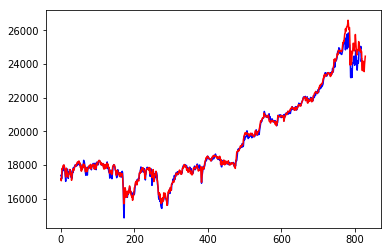

array([ 17387.1484375 ,  17373.43945312,  17191.07421875,  17454.00195312,
        17607.00195312,  17789.97265625,  17676.54101562,  17835.2890625 ,
        17991.40625   ,  17954.30664062,  17821.00585938,  17608.15625   ,
        17323.546875  ,  17034.37304688,  17493.68554688,  17658.2421875 ,
        17629.828125  ,  17727.18554688,  17760.34375   ,  17332.27148438,
        17213.09765625,  17473.52148438,  17601.10351562,  17492.62304688,
        17562.94335938,  17733.9140625 ,  17642.05859375,  17653.25      ,
        17264.06445312,  17335.10546875,  17217.9375    ,  17391.01171875,
        17687.47460938,  17558.69140625,  17848.26367188,  17723.50195312,
        17798.27734375,  17936.06640625,  17921.203125  ,  18021.54101562,
        17983.90820312,  17957.91015625,  17977.4296875 ,  17953.34375   ,
        18016.72070312,  18016.6796875 ,  18129.23046875,  18171.04101562,
        18127.31054688,  18041.49804688,  18016.85742188,  18035.85546875,
        17989.69726562,  

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf


#LSTM
def lstm(X):
    
    batch_size=tf.shape(X)[0]
    time_step=tf.shape(X)[1]
    w_in=weights['in']
    b_in=biases['in']
    input=tf.reshape(X,[-1,input_size])  
    input_rnn=tf.matmul(input,w_in)+b_in
    input_rnn=tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
    cell=tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnn_unit, reuse = True)
    init_state=cell.zero_state(batch_size,dtype=tf.float32)
    output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)
    output=tf.reshape(output_rnn,[-1,rnn_unit]) 
    w_out=weights['out']
    b_out=biases['out']
    pred=tf.matmul(output,w_out)+b_out
    return pred,final_states


# Model prediction
def prediction(time_step=20):
    X=tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    mean,std,test_x,test_y=get_test_data(time_step)
    with tf.variable_scope("sec_lstm",reuse=True):
        pred,_=lstm(X)
    saver=tf.train.Saver(tf.global_variables())
    with tf.Session() as sess:
        #read parameters
        module_file = tf.train.latest_checkpoint('./')
        saver.restore(sess, module_file)
        test_predict=[]
        for step in range(len(test_x)-1):
          prob=sess.run(pred,feed_dict={X:[test_x[step]]})
          predict=prob.reshape((-1))
          test_predict.extend(predict)
        test_y=np.array(test_y)*std[7]+mean[7]
        test_predict=np.array(test_predict)*std[7]+mean[7]
        acc=np.average(np.abs(test_predict-test_y[:len(test_predict)])/test_y[:len(test_predict)])  
        print("PMSE:",acc)
        
        plt.figure()
        plt.plot(list(range(len(test_predict))), test_predict, color='b',)
        plt.plot(list(range(len(test_y))), test_y,  color='r')
        plt.show()
    return test_predict

prediction()